<a href="https://colab.research.google.com/github/Deepakchakra/Mini-project-audio-signal-classification-/blob/main/audio_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, MaxPooling1D, Flatten, Dense
import pandas as pd

In [4]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [6]:
#Import the files to Google Colab
df = pd.read_csv('/content/drive/MyDrive/audio_data/dataset/Music Info.csv')

# Show 10 first Row
df.head(10)

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4
5,TRUMISQ128F9340BEE,Somebody Told Me,The Killers,https://p.scdn.co/mp3-preview/0d07673cfb46218a...,0FNmIQ7u45Lhdn6RHhSLix,"rock, alternative, indie, pop, alternative_roc...",NaN,2005,198480,0.508,...,10,-4.289,0,0.0847,0.000087,0.000643,0.0641,0.704,138.030,4
6,TRVCCWR128F9304A30,Viva la Vida,Coldplay,https://p.scdn.co/mp3-preview/ab747fed1bfab2ac...,08A1lZeyLMWH58DT6aYjnC,"rock, alternative, indie, pop, alternative_roc...",NaN,2013,235384,0.588,...,8,-7.903,1,0.1050,0.153000,0.000000,0.0634,0.520,137.973,4
7,TRXOGZT128F424AD74,Karma Police,Radiohead,https://p.scdn.co/mp3-preview/5a09f5390e2862af...,01puceOqImrzSfKDAcd1Ia,"rock, alternative, indie, alternative_rock, in...",NaN,1996,264066,0.360,...,7,-9.129,1,0.0260,0.062600,0.000092,0.1720,0.317,74.807,4
8,TRMZXEW128F9341FD5,The Scientist,Coldplay,https://p.scdn.co/mp3-preview/95cb9df1b056d759...,0GSSsT9szp0rJkBrYkzy6s,"rock, alternative, indie, pop, alternative_roc...",Rock,2007,311014,0.566,...,5,-7.826,1,0.0242,0.715000,0.000014,0.1200,0.173,146.365,4
9,TRUJIIV12903CA8848,Clocks,Coldplay,https://p.scdn.co/mp3-preview/24c7fe858b234e3c...,0BCPKOYdS2jbQ8iyB56Zns,"rock, alternative, indie, pop, alternative_roc...",NaN,2002,307879,0.577,...,5,-7.215,0,0.0279,0.599000,0.011500,0.1830,0.255,130.970,4


In [7]:
# Check the Data Infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

In [8]:
# Selecting the Feature, by remove the unused feature

feature = ['time_signature']
x = df.drop(feature, axis=1)
# Set The Target
y= df["time_signature"]


In [9]:
# Split Data
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle = False, test_size=0.25, random_state=23)

In [10]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential()

model.add(SimpleRNN(24,activation="tanh",return_sequences=True, input_shape=(13,1))),
model.add(SimpleRNN(12,activation="tanh",return_sequences=True)),
model.add(SimpleRNN(6,activation="tanh",return_sequences=True)),
model.add(SimpleRNN(3,activation="tanh",return_sequences=False)),
model.add(Dense(5, activation="softmax"))

# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 13, 24)         │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 13, 12)         │           444 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 13, 6)          │           114 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 3)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,232 (4.81 KB)

 Trainable params: 1,232 (4.81 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the model

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 13, 24)         │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 13, 12)         │           444 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 13, 6)          │           114 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 3)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,232 (4.81 KB)

 Trainable params: 1,232 (4.81 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from sklearn.preprocessing import LabelEncoder

# Select only numeric columns for training
X_train_numeric = X_train.select_dtypes(include=np.number)
X_test_numeric = X_test.select_dtypes(include=np.number)

# Reshape data for CNN (samples, timesteps, features)
X_train_reshaped = X_train_numeric.values.reshape(X_train_numeric.shape[0], X_train_numeric.shape[1], 1)
X_test_reshaped = X_test_numeric.values.reshape(X_test_numeric.shape[0], X_test_numeric.shape[1], 1)

# Map target labels to a contiguous range
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


history = model.fit(X_train_reshaped, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8496 - loss: 0.6865 - val_accuracy: 0.9087 - val_loss: 0.3589
Epoch 2/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8904 - loss: 0.4040 - val_accuracy: 0.9087 - val_loss: 0.3358
Epoch 3/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8928 - loss: 0.3833 - val_accuracy: 0.9087 - val_loss: 0.3281
Epoch 4/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8913 - loss: 0.3771 - val_accuracy: 0.9087 - val_loss: 0.3232
Epoch 5/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8923 - loss: 0.3745 - val_accuracy: 0.9087 - val_loss: 0.3234
Epoch 6/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8918 - loss: 0.3753 - val_accuracy: 0.9087 - val_loss: 0.3170
Epoch 7/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8927 - loss: 0.3649 - val_accuracy: 0.9087 - val_loss: 0.3226
Epoch 8/100
951/951 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8941 - loss: 0

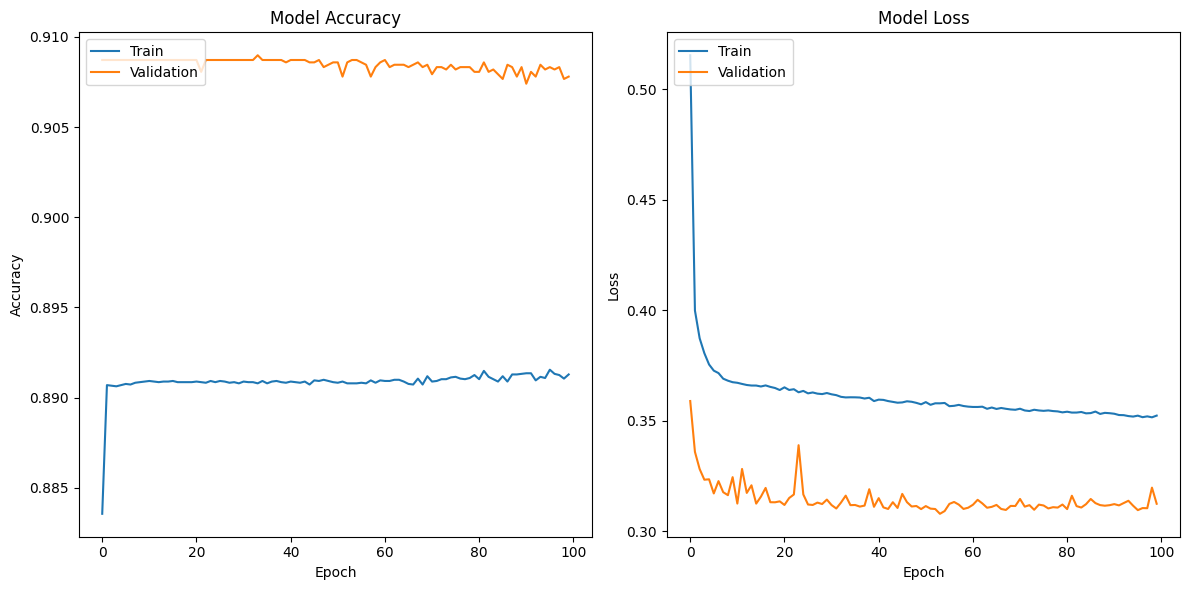

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [14]:
# Generate some test data

# Predict on test data
predictions = model.predict(X_test_reshaped)

# Print predictions
print("Predictions:")
print(predictions)

# Evaluate the model on test data (if you have labels)

loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

396/396 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
Predictions:
[[1.1488344e-09 1.0520429e-02 1.9243294e-01 7.8670490e-01 1.0341671e-02]
 [6.4299045e-11 4.4272412e-03 6.4615384e-02 9.2603976e-01 4.9176156e-03]
 [3.5530979e-12 1.2169509e-03 1.0779455e-02 9.8639470e-01 1.6089824e-03]
 ...
 [1.8331678e-08 5.7110554e-03 1.7334200e-02 9.6142554e-01 1.5529203e-02]
 [1.7699753e-11 2.3466232e-03 2.4734845e-02 9.6989596e-01 3.0225799e-03]
 [5.2851434e-09 1.3820857e-02 1.5643485e-01 8.0778426e-01 2.1959987e-02]]
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8584 - loss: 0.4707
Test loss: 0.4454, Test accuracy: 0.8674


In [15]:

pred = model.predict(X_test_reshaped)
pred_y = pred.argmax(axis=-1)

396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [16]:
import numpy as np
print(np.shape(pred_y))

(12671,)


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[    2     0     1     0     0     0]
 [    0     0     1   152     0     0]
 [    0     0     0     0     0     0]
 [    0     0    18  1239     0     0]
 [    0     0    23 10971     2     0]
 [    0     0     3   259     0     0]]


In [18]:
print(cm[:,3])

[    0   152     0  1239 10971   259]


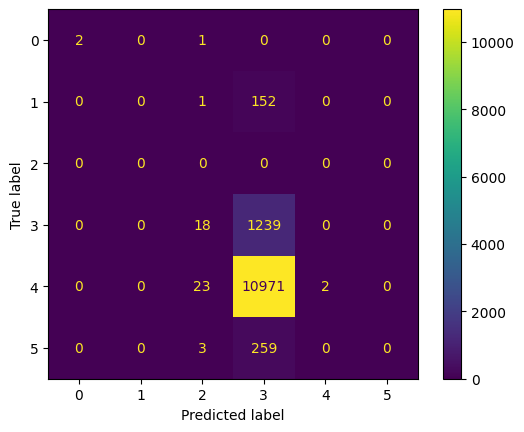

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test, pred_y)
#disp.plot()

In [20]:
print(np.shape(y_test))
print(np.shape(pred_y))

(12671,)
(12671,)


In [21]:
print(np.shape(y_test))

(12671,)


In [22]:
from sklearn import metrics
# Show the Accuracy, Precision, Recall, F1, etc.
acc = metrics.accuracy_score(y_test, pred_y)
prec= metrics.precision_score(y_test, pred_y, average='weighted')
rec = metrics.recall_score(y_test, pred_y, average='weighted')
f1 = metrics.f1_score(y_test, pred_y, average='weighted')
kappa = metrics.cohen_kappa_score(y_test, pred_y)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print(kappa)

Accuracy: 0.09809801909872938
Precision: 0.8777838635026909
Recall: 0.09809801909872938
F1 Score: 0.018218305530614435
-0.0009438323203241339


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00       153
           2       0.00      0.00      0.00         0
           3       0.10      0.99      0.18      1257
           4       1.00      0.00      0.00     10996
           5       0.00      0.00      0.00       262

    accuracy                           0.10     12671
   macro avg       0.35      0.28      0.16     12671
weighted avg       0.88      0.10      0.02     12671



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

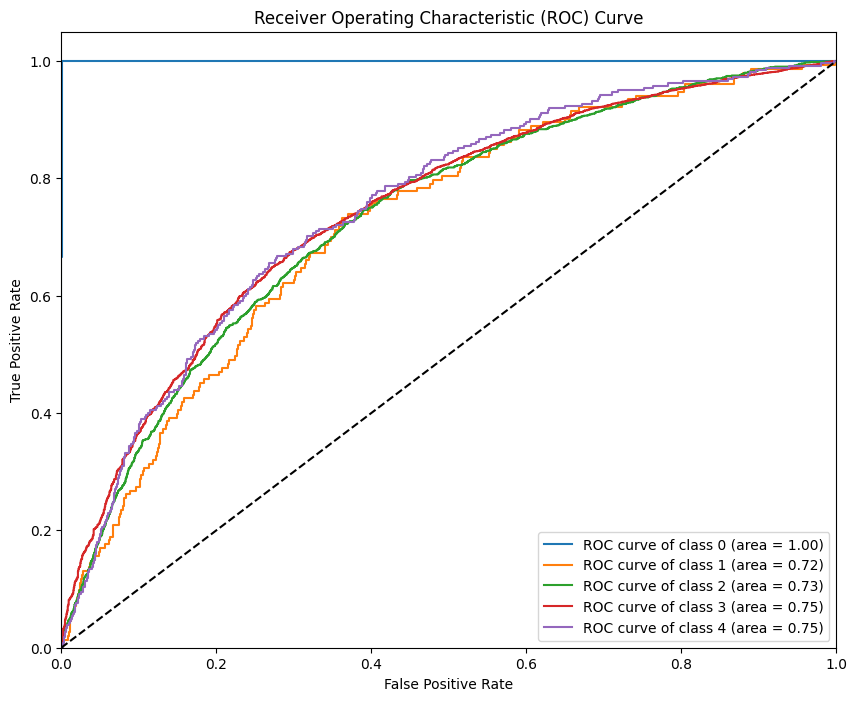

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 3, 4, 5])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00       153
           2       0.00      0.00      0.00         0
           3       0.10      0.99      0.18      1257
           4       1.00      0.00      0.00     10996
           5       0.00      0.00      0.00       262

    accuracy                           0.10     12671
   macro avg       0.35      0.28      0.16     12671
weighted avg       0.88      0.10      0.02     12671



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [26]:
display(df['time_signature'].value_counts())

,count
time_signature,
4,44989
3,4501
5,732
1,451
0,10


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00       153
           2       0.00      0.00      0.00         0
           3       0.10      0.99      0.18      1257
           4       1.00      0.00      0.00     10996
           5       0.00      0.00      0.00       262

    accuracy                           0.10     12671
   macro avg       0.35      0.28      0.16     12671
weighted avg       0.88      0.10      0.02     12671



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [28]:
from sklearn import metrics
# Show the Accuracy, Precision, Recall, F1, etc.
acc = metrics.accuracy_score(y_test, pred_y)
prec= metrics.precision_score(y_test, pred_y, average='weighted')
rec = metrics.recall_score(y_test, pred_y, average='weighted')
f1 = metrics.f1_score(y_test, pred_y, average='weighted')
kappa = metrics.cohen_kappa_score(y_test, pred_y)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print(kappa)

Accuracy: 0.09809801909872938
Precision: 0.8777838635026909
Recall: 0.09809801909872938
F1 Score: 0.018218305530614435
-0.0009438323203241339


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
